Here, we will summarize the results from the classification and regression benchmarks.

# Classification

We have benchmarked the PLS balances against, t-test, Mann-Whitney U-test and ANCOM.

We have run two different benchmarks, namely varying effect size, and the number of varying species.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this particular benchmark, there are 100 species that are changing abundance.  We will measure the sensitivity and specificity of all of these tools.

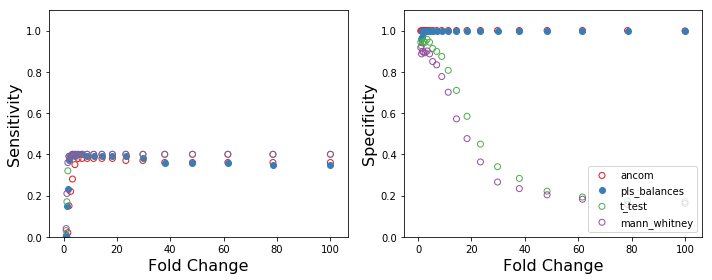

In [3]:
fname = '../results/effect_size_benchmarks_round6/confusion_matrix.summary'
results = pd.read_table(fname, index_col=0)
tools = ['ancom', 'pls_balances', 
         't_test', 'mann_whitney']
for t in tools:
    results['%s_sensitivity' % t] = results['%s_TP' % t] / (results['%s_TP' % t] + results['%s_FN' % t])
    results['%s_specificity' % t] = results['%s_TN' % t] / (results['%s_TN' % t] + results['%s_FP' % t])

colors = sns.color_palette("Set1", len(tools))
colors = list(map(lambda x: '#%02x%02x%02x' % (int(x[0]*255), int(x[1]*255), int(x[2]*255)), colors))
colors = dict(zip(tools, colors))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for t in tools:
    if t == 'pls_balances':
        fc = colors[t]
    else:
        fc = 'none'

    ax[0].scatter(results['effect_size'], results['%s_sensitivity' % t], 
                  label=t, facecolors=fc, edgecolor=colors[t])
    ax[1].scatter(results['effect_size'], results['%s_specificity' % t],
                  label=t, facecolors=fc, edgecolor=colors[t])

ax[0].set_xlabel('Fold Change', fontsize=16)
ax[0].set_ylabel('Sensitivity', fontsize=16)
ax[1].set_xlabel('Fold Change', fontsize=16)
ax[1].set_ylabel('Specificity', fontsize=16)
ax[0].set_ylim([0, 1.1])
ax[1].set_ylim([0, 1.1])

#ax[0].set_xlim([0, 60000])
#ax[1].set_xlim([0, 60000])
ax[1].legend(loc=4)
plt.tight_layout()
fig.savefig('../results/figures/figure2a.pdf')

Now, let's look at the number of varying species benchmark.

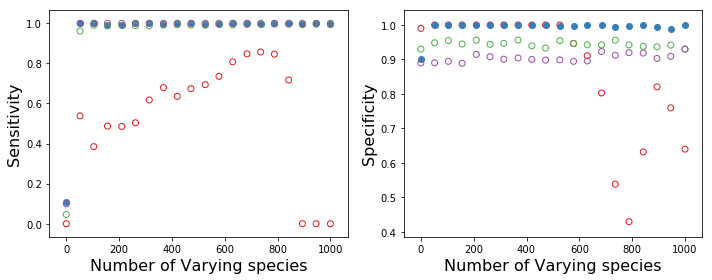

In [3]:
fname = '../results/variable_features_benchmarks_round4/confusion_matrix.summary'
results = pd.read_table(fname, index_col=0)
tools = ['ancom', 'pls_balances', 't_test', 'mann_whitney']
for t in tools:
    results['%s_sensitivity' % t] = results['%s_TP' % t] / (results['%s_TP' % t] + results['%s_FN' % t])
    results['%s_specificity' % t] = results['%s_TN' % t] / (results['%s_TN' % t] + results['%s_FP' % t])

colors = sns.color_palette("Set1", len(tools))
colors = list(map(lambda x: '#%02x%02x%02x' % (int(x[0]*255), int(x[1]*255), int(x[2]*255)), colors))
colors = dict(zip(tools, colors))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for t in tools:
    if t == 'pls_balances':
        fc = colors[t]
    else:
        fc = 'none'

    ax[0].scatter(results['n_diff'], results['%s_sensitivity' % t], 
                  label=t, facecolors=fc, edgecolor=colors[t])
    ax[1].scatter(results['n_diff'], results['%s_specificity' % t],
                  label=t, facecolors=fc, edgecolor=colors[t])

ax[0].set_xlabel('Number of Varying species', fontsize=16)
ax[0].set_ylabel('Sensitivity', fontsize=16)
ax[1].set_xlabel('Number of Varying species', fontsize=16)
ax[1].set_ylabel('Specificity', fontsize=16)
#ax[0].legend()
plt.tight_layout()

fig.savefig('../results/figures/figure2b.pdf')

# Regression

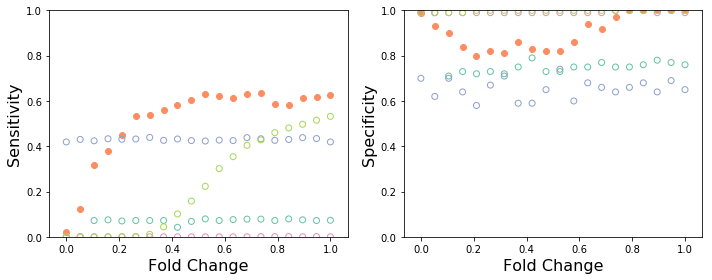

In [4]:
fname = '../results/effect_size_regression_benchmarks_round4/confusion_matrix.summary'
results = pd.read_table(fname, index_col=0)
tools = ['lasso', 'pls_balances', 'random_forest', 'pearson', 'spearman']
for t in tools:
    results['%s_sensitivity' % t] = results['%s_TP' % t] / (results['%s_TP' % t] + results['%s_FN' % t])
    results['%s_specificity' % t] = results['%s_TN' % t] / (results['%s_TN' % t] + results['%s_FP' % t])

colors = sns.color_palette("Set2", len(tools))
colors = list(map(lambda x: '#%02x%02x%02x' % (int(x[0]*255), int(x[1]*255), int(x[2]*255)), colors))
colors = dict(zip(tools, colors))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for t in tools:
    if t == 'pls_balances':
        fc = colors[t]
    else:
        fc = 'none'

    ax[0].scatter(results['effect_size'], results['%s_sensitivity' % t], 
                  label=t, facecolors=fc, edgecolor=colors[t])
    ax[1].scatter(results['effect_size'], results['%s_specificity' % t],
                  label=t, facecolors=fc, edgecolor=colors[t])

ax[0].set_xlabel('Fold Change', fontsize=16)
ax[0].set_ylabel('Sensitivity', fontsize=16)
ax[1].set_xlabel('Fold Change', fontsize=16)
ax[1].set_ylabel('Specificity', fontsize=16)
ax[0].set_ylim([0, 1.1])
ax[1].set_ylim([0, 1.1])

plt.tight_layout()
fig.savefig('../results/figures/figure2c.pdf')
#ax[1].legend()

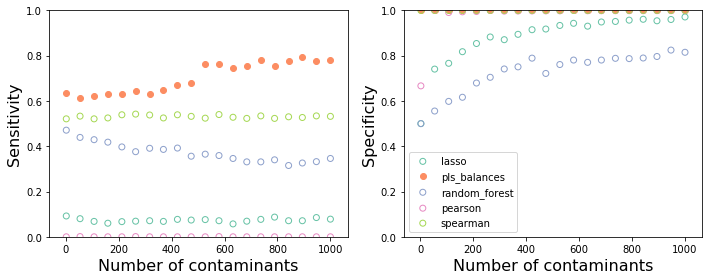

In [5]:
fname = '../results/variable_contaminants_benchmarks_round4/confusion_matrix.summary'
results = pd.read_table(fname, index_col=0)
tools = ['lasso', 'pls_balances', 'random_forest', 'pearson', 'spearman']
for t in tools:
    results['%s_sensitivity' % t] = results['%s_TP' % t] / (results['%s_TP' % t] + results['%s_FN' % t])
    results['%s_specificity' % t] = results['%s_TN' % t] / (results['%s_TN' % t] + results['%s_FP' % t])

colors = sns.color_palette("Set2", len(tools))
colors = list(map(lambda x: '#%02x%02x%02x' % (int(x[0]*255), int(x[1]*255), int(x[2]*255)), colors))
colors = dict(zip(tools, colors))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for t in tools:
    if t == 'pls_balances':
        fc = colors[t]
    else:
        fc = 'none'
    ax[0].scatter(results['n_contaminants'], results['%s_sensitivity' % t], 
                  label=t, facecolors=fc, edgecolor=colors[t])
    ax[1].scatter(results['n_contaminants'], results['%s_specificity' % t],
                  label=t, facecolors=fc, edgecolor=colors[t])


ax[0].set_xlabel('Number of contaminants', fontsize=16)
ax[0].set_ylabel('Sensitivity', fontsize=16)
ax[1].set_xlabel('Number of contaminants', fontsize=16)
ax[1].set_ylabel('Specificity', fontsize=16)
ax[1].legend()
ax[0].set_ylim([0, 1.1])
ax[1].set_ylim([0, 1.1])

plt.tight_layout()

fig.savefig('../results/figures/figure2d.pdf')